In [1]:
%load_ext autoreload
%autoreload 2

import os
base_path = '/Users/satya/Documents/Github_Projects/neural-representation-sqw'
os.chdir(base_path)
from src.utils import * 
import pandas as pd


2023-03-21 09:04:14.428986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Error of ML prediction from Analytical 

In [2]:
# y_ml_predictions = pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'j1_j2_predictions.csv'), header=None)

In [12]:
# np.mean((np.array([0.328,1.220]) - np.array(y_ml_predictions.iloc[2])[1:3])/np.array([0.328,1.220]),axis=1)

### Figure 1 - Overview Plots

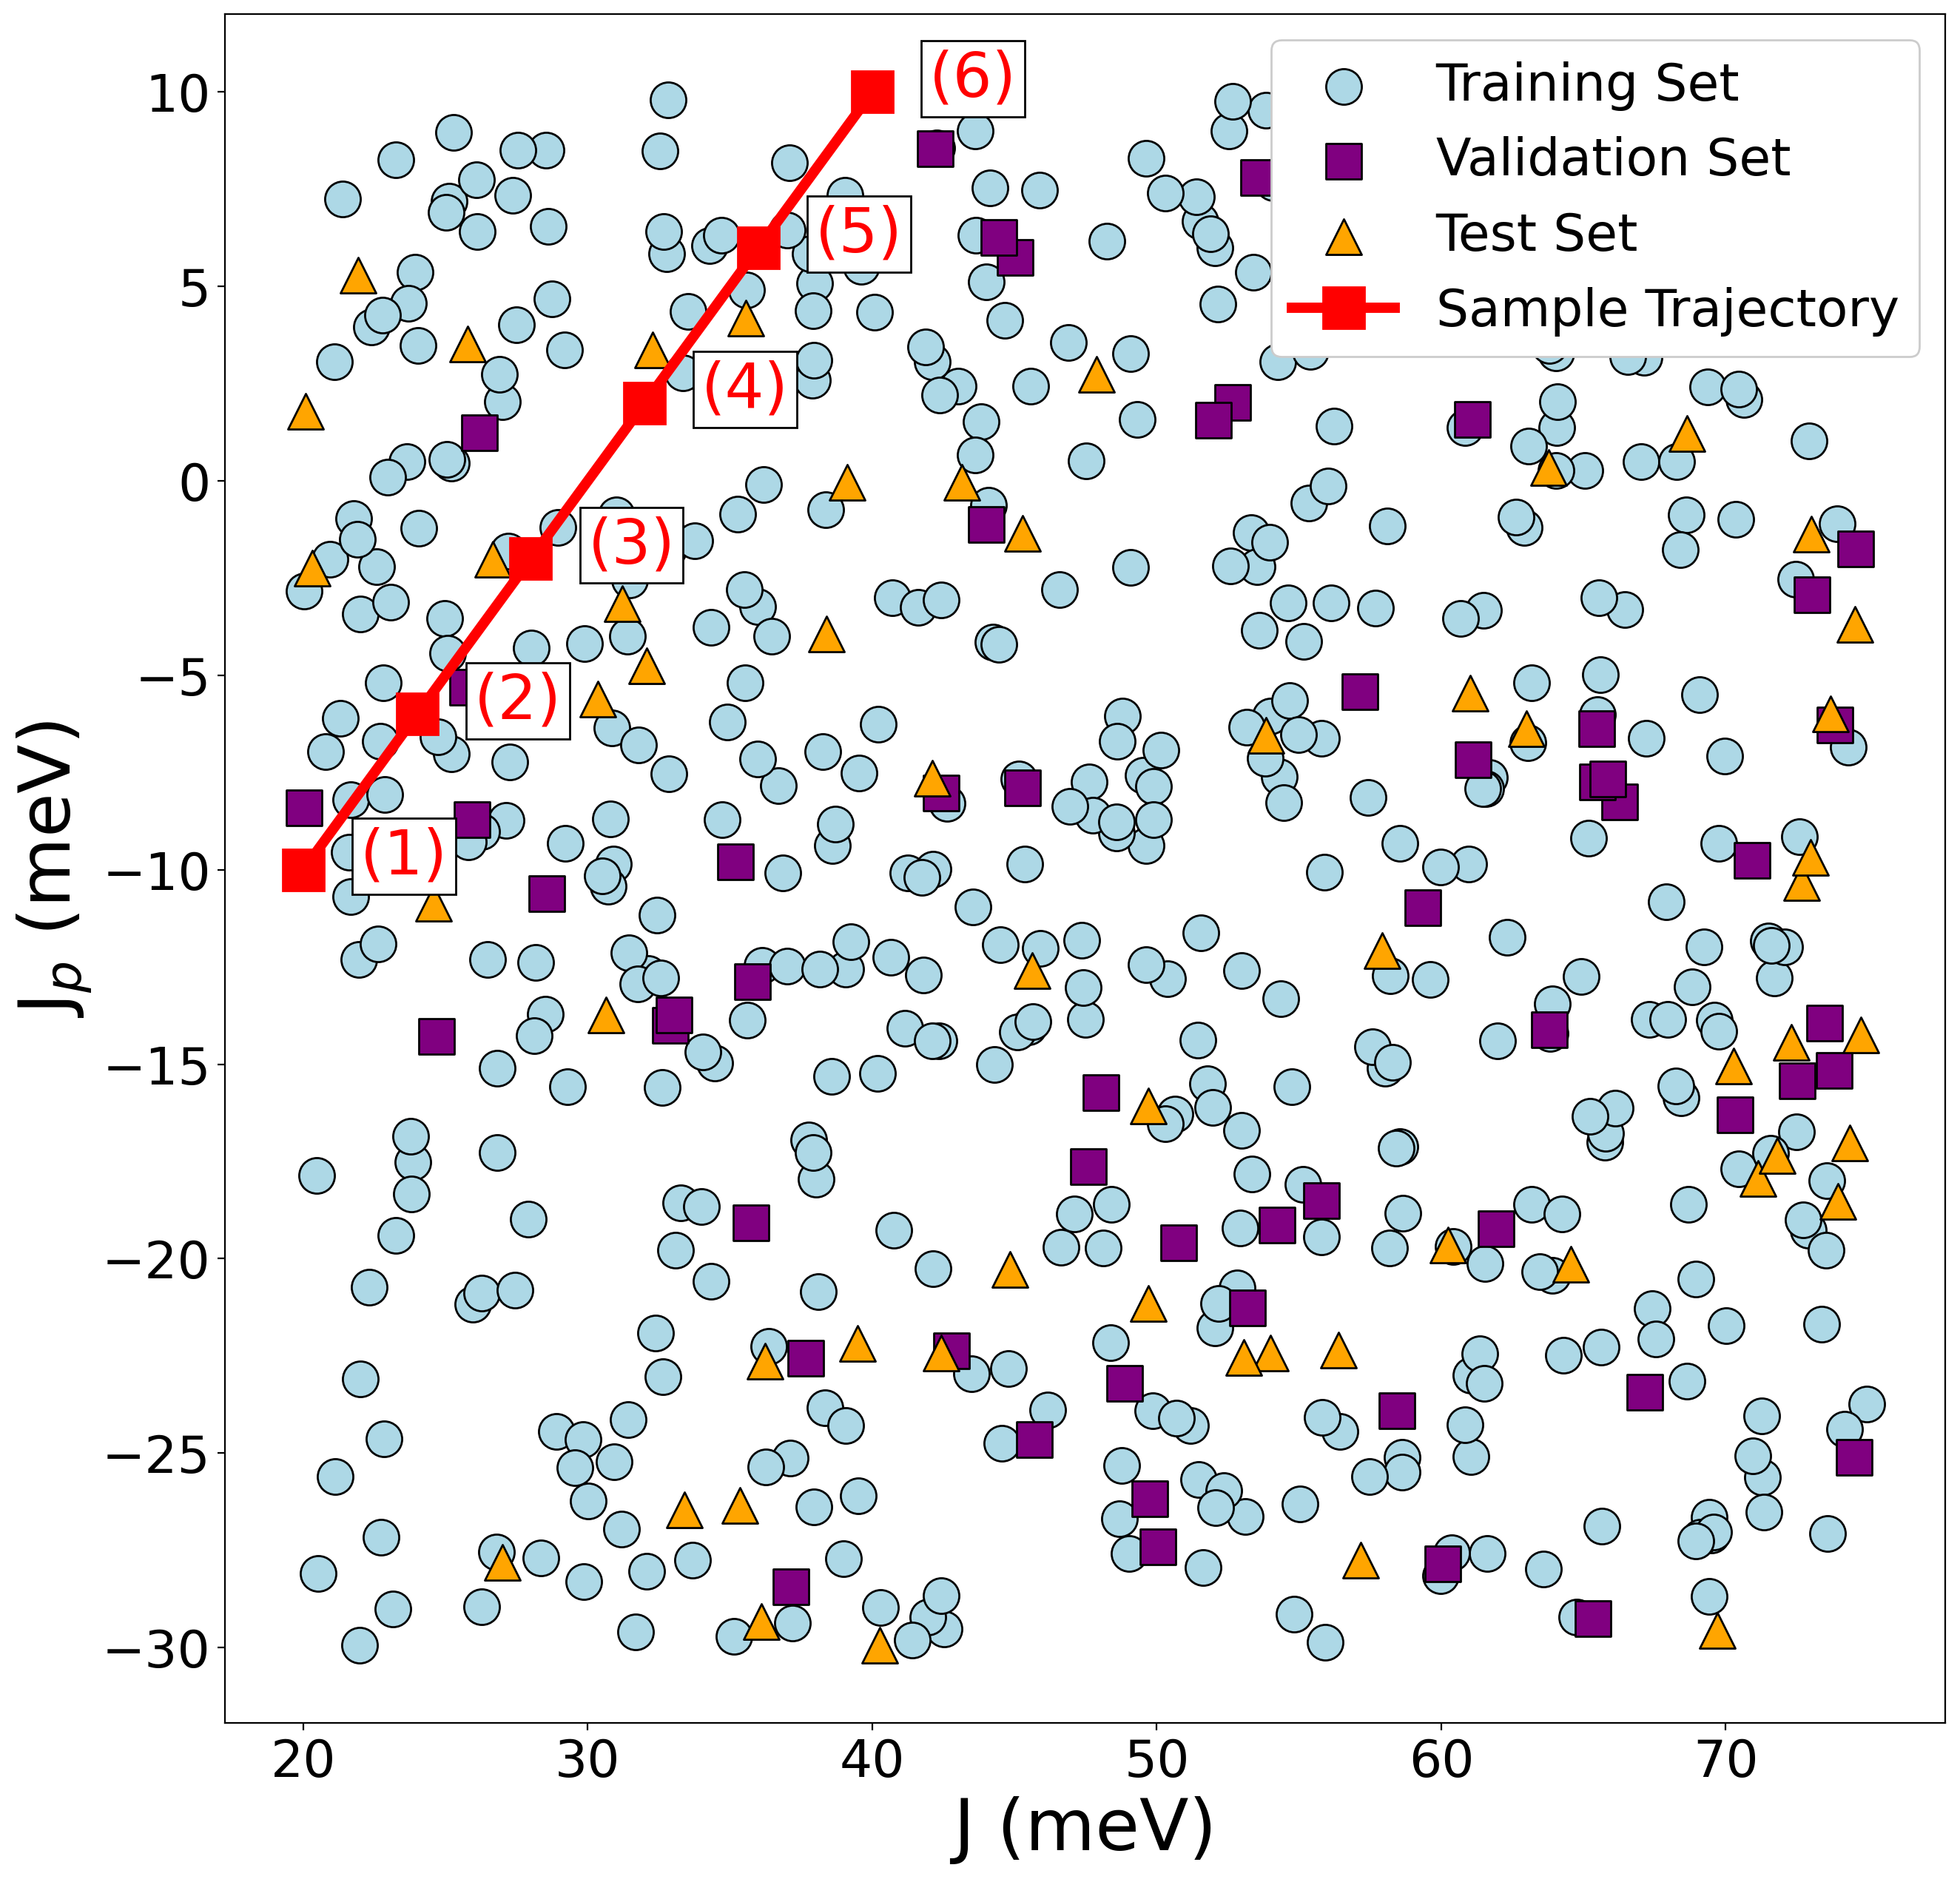

In [66]:
mapping_slice1 = np.load(os.path.join(base_path, 'converted_simulation_data_2023', 'mapping_path_1_2023.npy'))
y_data = pd.read_csv(os.path.join(base_path, 'data_simulation_2023', 'AFM_PATH_1', 'parameters.csv'))
y_regression = np.array(y_data[['J','Jp']])

plt.figure(figsize=(15,15), dpi = 200)
plt.scatter(y_regression[mapping_slice1[:,1] == 0.0,0], y_regression[mapping_slice1[:,1] == 0.0,1], color = 'lightblue', edgecolor='k', s = 300, label = 'Training Set') 
plt.scatter(y_regression[mapping_slice1[:,1] == 1.0,0], y_regression[mapping_slice1[:,1] == 1.0,1], color = 'purple', edgecolor='k',marker = 's', s = 300, label = 'Validation Set')   
plt.scatter(y_regression[mapping_slice1[:,1] == 2.0,0], y_regression[mapping_slice1[:,1] == 2.0,1], color = 'orange', edgecolor='k', marker='^', s = 300,  label = 'Test Set') 
plt.xlabel('J (meV)', fontsize = 35)
plt.ylabel('J$_p$ (meV)', fontsize = 35)
plt.xticks(size=25)
plt.yticks(size=25)
new_path = np.stack((np.linspace(20, 40, 6), np.linspace(-10, 10, 6))).T

plt.plot(new_path[:,0], new_path[:,1], '-rs', linewidth = 5.0,  markersize=20, alpha=1, label = 'Sample Trajectory')
bbox = dict(facecolor='white', alpha=1)

for i, txt in enumerate(['(1)', '(2)', '(3)', '(4)', '(5)', '(6)']):
    plt.annotate(txt, (new_path[i,0]+2, new_path[i,1]-0.1), color = 'r', fontsize = 30, bbox=bbox)

plt.legend(loc='upper right', framealpha=1, fontsize=25)
plt.savefig('figures/figures_as_eps/train_valid_test.pdf', format='pdf')
plt.show()

In [6]:
model = tf.keras.models.load_model('models/siren')


2023-03-21 09:06:52.888267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([30.9021987 , -9.84876857])

 51/918 [>.............................] - ETA: 0s 

/var/folders/tg/bbd913xj0p1cq705wd9y8s_00000gn/T/ipykernel_48337/274123782.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('turbo')


918/918 [==============================] - 1s 791us/step


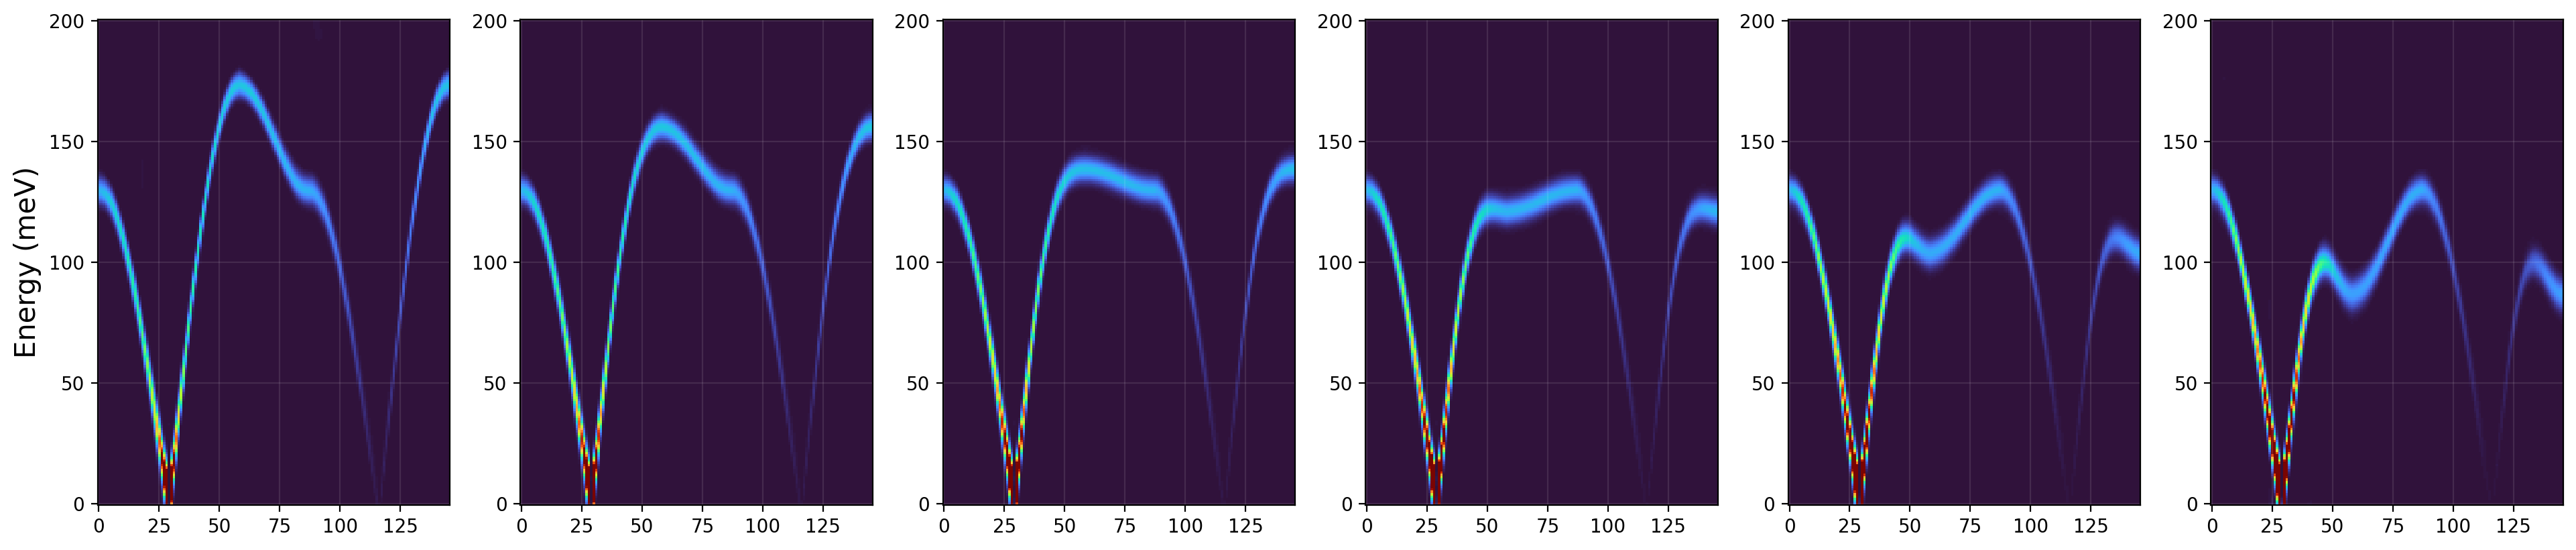

In [54]:
locations_of_x_gridlines = np.array((145/216) * np.array([0, 37.0621, 89.4722, 126.5278, 163.5900, 216.0000]), dtype=np.int16)

from matplotlib.colors import LogNorm
k = 1
c_q = np.array(pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'Klist_' + str(k) + '.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'Elist_' + str(k) + '.csv'), header=None)).T

new_path = np.stack((np.linspace(20, 40, 6), np.linspace(-10, 10, 6))).T

fig=plt.figure(figsize=(40,25), dpi = 200)
columns = 10
rows = 1
i = 1
for n, jvector in enumerate(new_path):
    j = jvector[0]
    jp = jvector[1]
    
    j1, j2 = normalize_j_jp(j, jp)

    y_img = path2mesh_expt(float(j1), float(j2), c_q, c_E, model)
    fig.add_subplot(rows, columns, i)

    orig_map=plt.cm.get_cmap('turbo')
  
    # reversing the original colormap using reversed() function
    reversed_map = orig_map
    # Add the grid
    plt.grid(which='major', axis='both', linestyle='-', color='white',alpha=0.1)  
    plt.imshow(np.exp(y_img)-1, origin='lower', cmap=reversed_map, vmin=0, vmax=0.5)
    #plt.yticks(np.linspace(0,200,5),list(np.linspace(120,200,5).astype(int)))

    #locations_of_x_gridlines = np.array((145/216) * np.array([0, 37.0621, 89.4722, 126.5278, 163.5900, 216.0000]), dtype=np.int16)

    # for grid_line in locations_of_x_gridlines:
    #     plt.axvline(x=grid_line, color='white')
    #plt.xlabel("Trajectory " + str(n+1), fontsize = 20)
    

    #plt.xticks([])
    # plt.xticks([0, 29, 59, 87, 116, 146], ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=10)
    plt.yticks(np.linspace(0,200,5))
    #plt.xticks([])
    
    if i == 1:
        plt.ylabel('Energy (meV)', fontsize= 15)
    
    i += 1 

    
    #plt.show()


plt.savefig('figures/figures_as_eps/tajectory.pdf', format='pdf')
plt.show()
    
    

In [60]:
y_img.shape

(201, 146)

## Loss landscape

In [262]:
loss_landscape = np.load('figures/data_for_figures/loss_landscape_full.npy')

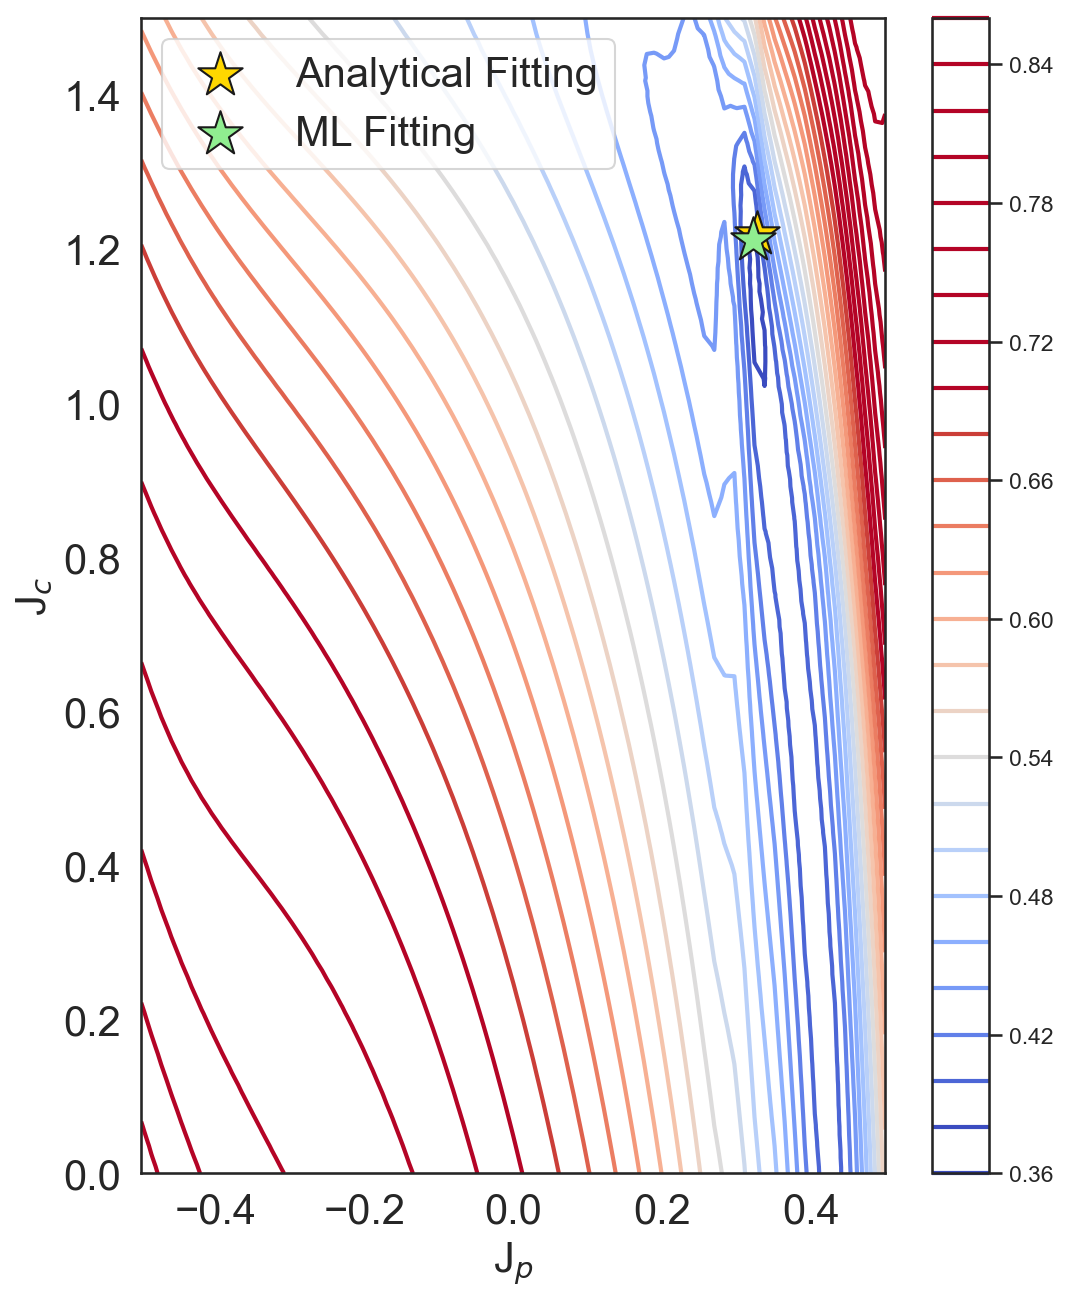

In [263]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
                                                           
plt.figure(figsize=(8, 10), dpi=150)
plt.tricontour(loss_landscape[:,0], loss_landscape[:,1], loss_landscape[:,2], 28,linewidths=2.0, cmap='coolwarm', vmin=0.38,vmax=0.7)
cbar = plt.colorbar()
#c#bar.set_label('Correlation loss value')
plt.scatter([0.328], [1.220], marker = '*', s=500, color = 'gold', edgecolor = 'k', label = 'Analytical Fitting', zorder=10)
plt.scatter([0.322], [1.212], marker = '*', s=500, color = 'lightgreen', edgecolor = 'k', label = 'ML Fitting',zorder=10)
plt.ylabel('J$_c$', fontsize = 20)
plt.xlabel("J$_p$", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize = 20)
plt.savefig('figures/figures_as_eps/loss_landscape.pdf', format='pdf')

plt.show()

## Example of Simulation and Predicted

In [20]:
model = tf.keras.models.load_model('siren')
example_test_index = 15
y_data = pd.read_csv(os.path.join(base_path, 'data_simulation_2023', 'AFM_PATH_1', 'parameters.csv'))
example_test = np.array(y_data[['J','Jp']])[example_test_index-1]

45.5724855822994 2.44603540401141
j1, j2:  0.46495428331453453 0.8111508851002853
918/918 [==============================] - 1s 804us/step


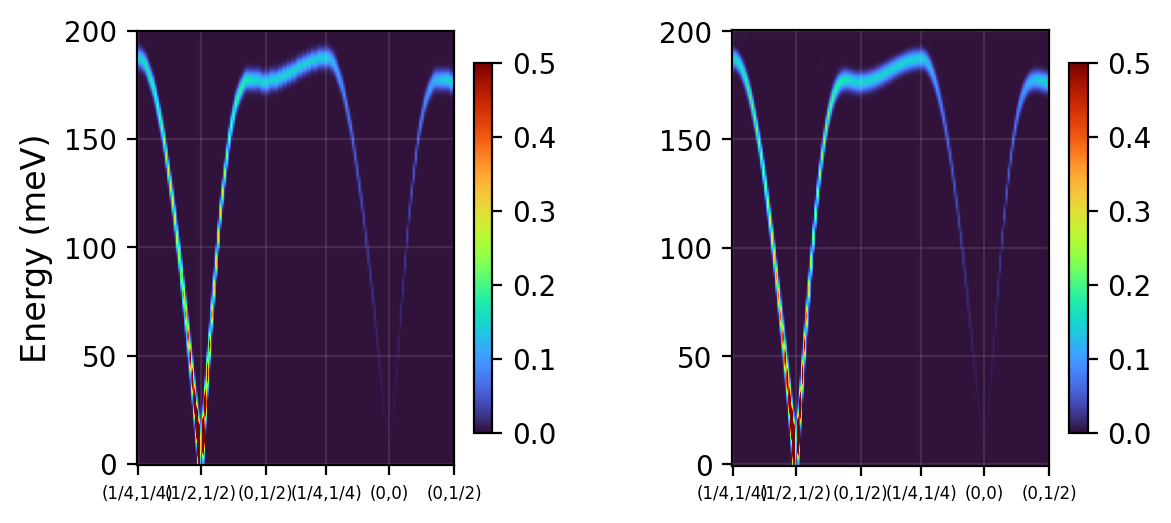

In [94]:
j = example_test[0]
jp = example_test[1]

print(j, jp)
j1, j2 = normalize_j_jp(j, jp)

locations_of_x_gridlines = np.array((145/216) * np.array([0, 37.0621, 89.4722, 126.5278, 163.5900, 216.0000]), dtype=np.int16)

print("j1, j2: ", j1, j2)

c_q = np.array(pd.read_csv(os.path.join(base_path, 'data_simulation_2023', 'AFM_PATH_1', 'Klist_15.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(base_path, 'data_simulation_2023', 'AFM_PATH_1', 'Elist_15.csv'), header=None)).T
c_sq = np.array(pd.read_csv(os.path.join(base_path, 'data_simulation_2023', 'AFM_PATH_1', 'Sqw_withCorrectBroadening_15.csv'), header=None)).T

y_pred = path2mesh_expt(float(j1), float(j2), c_q, c_E, model)

# Create subplot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 200)
shw = ax1.imshow(c_sq.T, origin='lower', cmap='turbo', vmin=0.0, vmax=0.5) 
plt.colorbar(shw, shrink=0.5)

sh2 = ax2.imshow(np.exp(y_pred)-1, origin='lower', cmap='turbo', vmin=0.0, vmax=0.5) 
plt.colorbar(sh2, shrink=0.5)


ax2.set_yticks(np.linspace(0,200,5))
ax1.set_yticks(np.linspace(0,200,5))
ax2.set_yticklabels(list(np.linspace(0,200,5).astype(int)), fontsize = 10)
ax1.set_yticklabels(list(np.linspace(0,200,5).astype(int)), fontsize = 10)
ax1.set_xticks([])
ax2.set_xticks([])
ax2.set_yticks([])

ax1.grid(which='major', axis='both', linestyle='-', color='white',alpha=0.1)  
ax2.grid(which='major', axis='both', linestyle='-', color='white',alpha=0.1)  

for tick in ax2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

ax1.set_xticks([0, 29, 59, 87, 116, 146], ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=6)
ax1.set_yticks(np.linspace(0,200,5))

ax2.set_xticks([0, 29, 59, 87, 116, 146], ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=6)
ax2.set_yticks(np.linspace(0,200,5))


plt.subplots_adjust(wspace=0.5)
#plt.tight_layout()
ax1.set_ylabel('Energy (meV)', fontsize= 12)
plt.savefig('figures/figures_as_eps/ml_sim_pred.pdf', format='pdf')
plt.show()
    
    

## Visualize Low Count Predictions 

In [182]:
indices = [3, 8, 10, 13, 14]

np.array(num_neutrons[indices],dtype=int)

array([  8366,  57237, 122765, 326952, 819863])

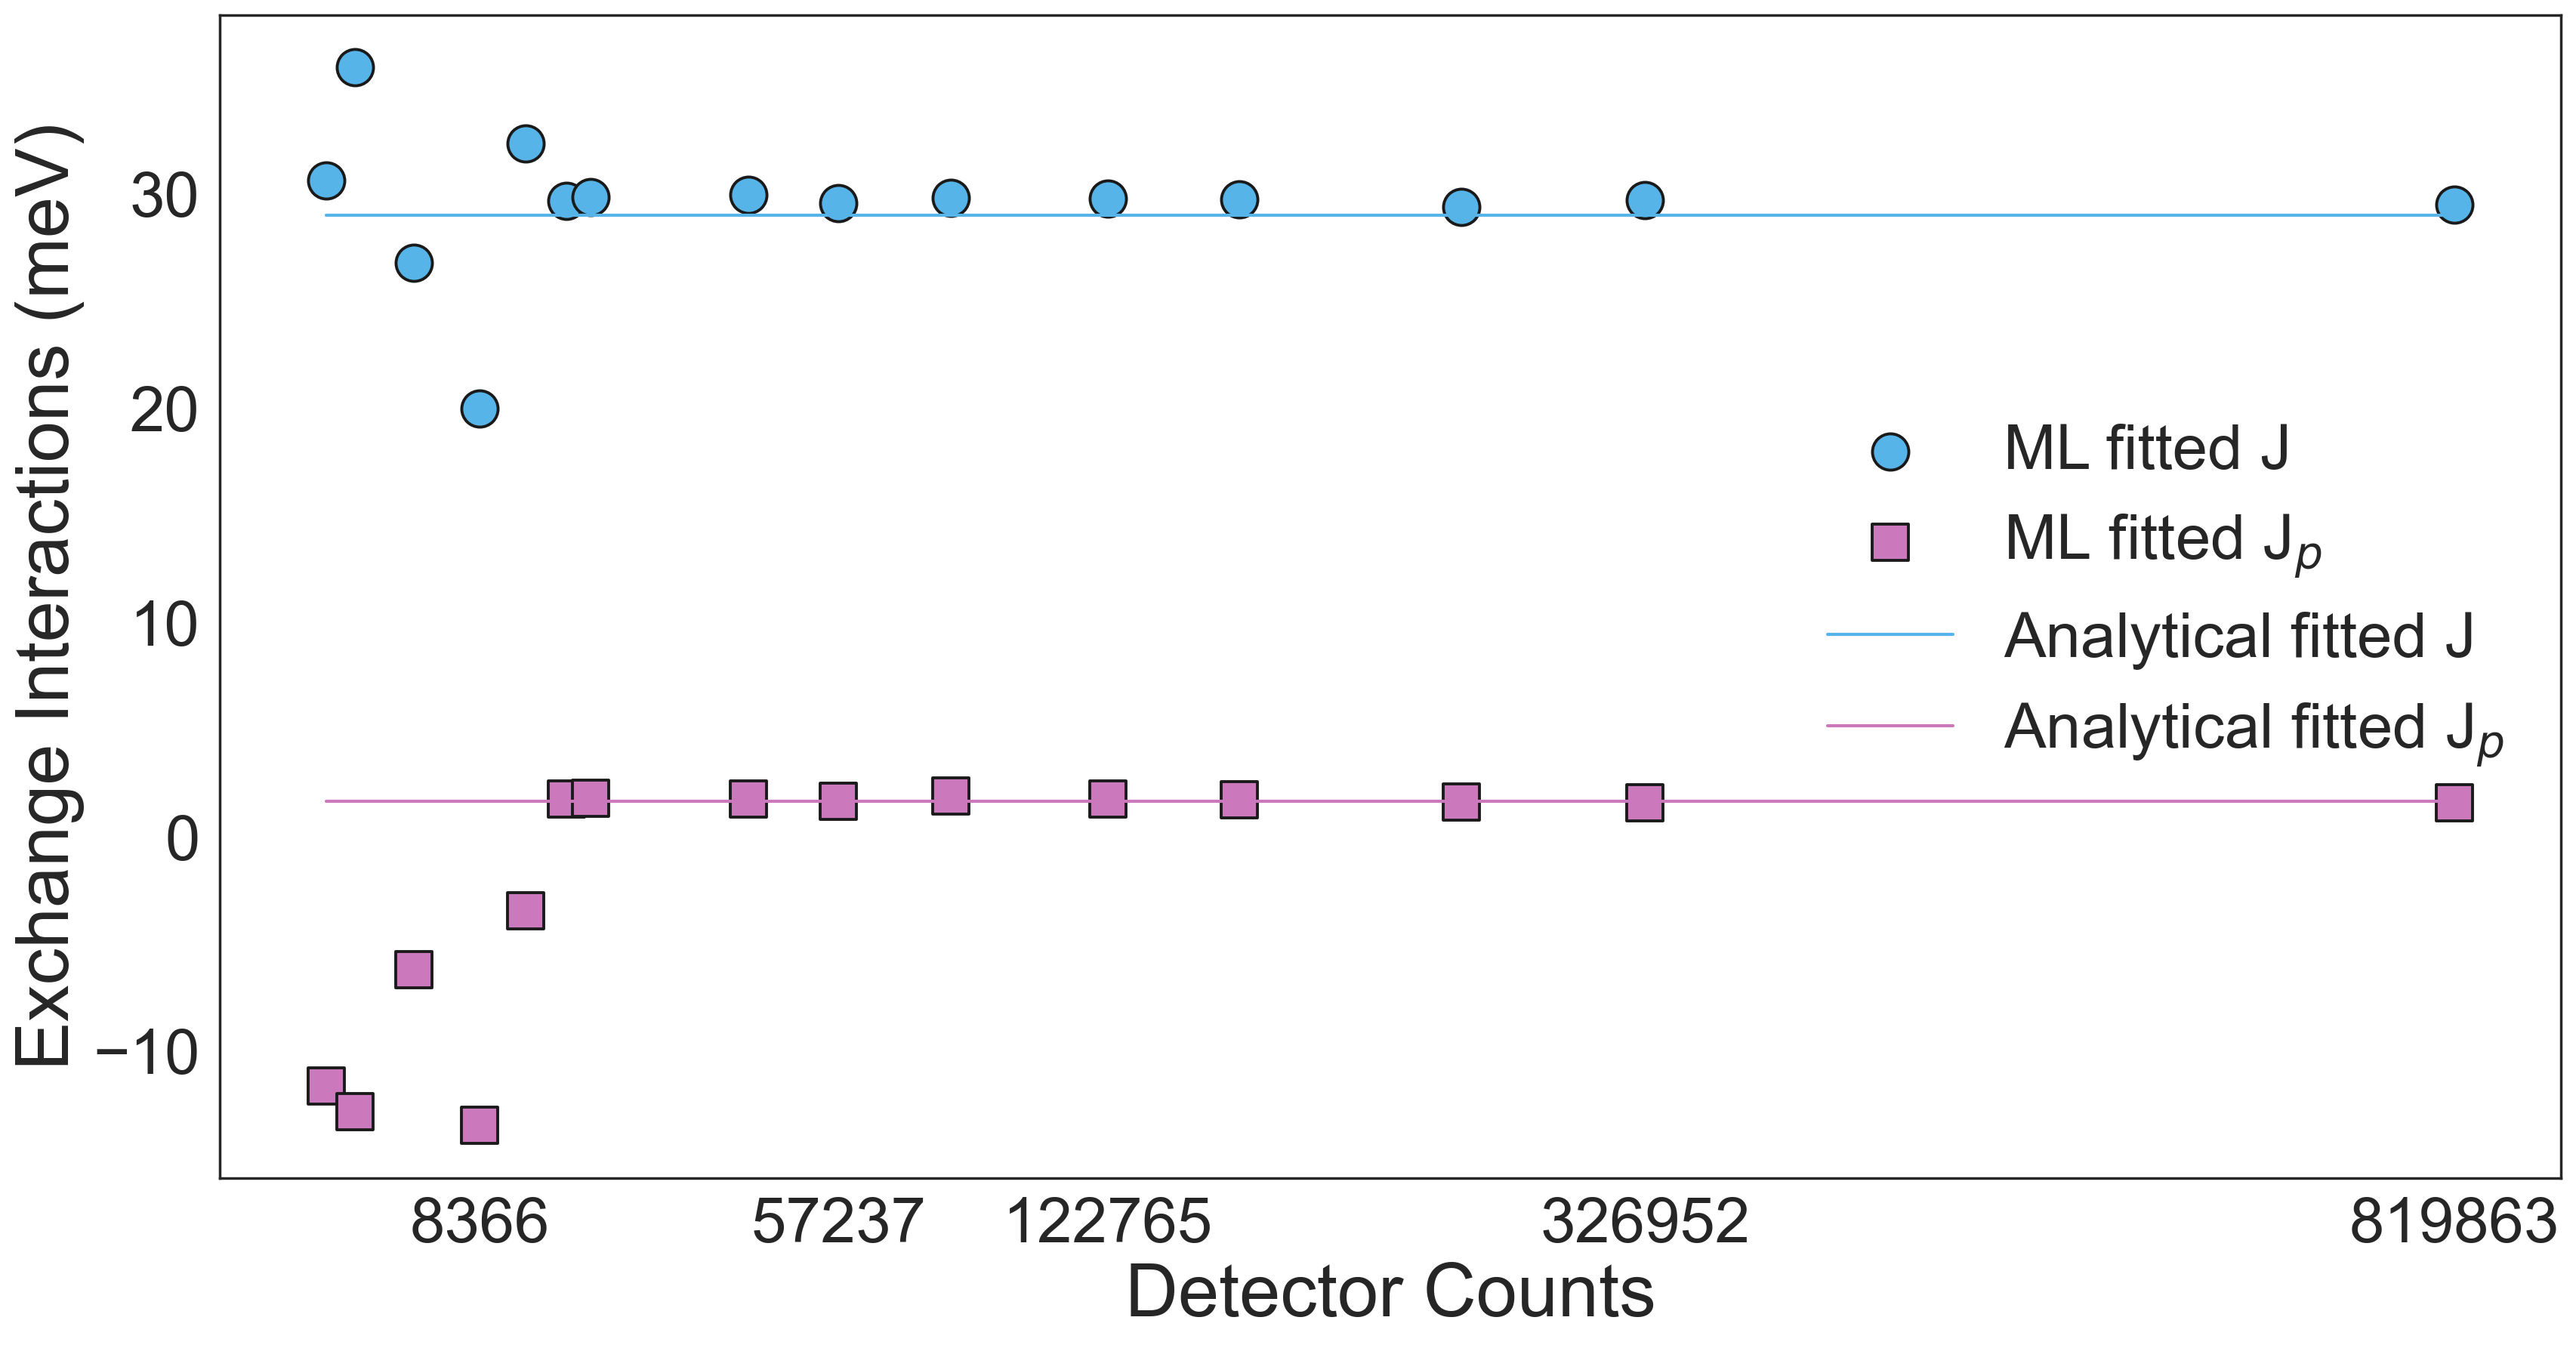

In [101]:
import seaborn as sns

preds = np.load('figures/data_for_figures/low_count_predictions.npy')
num_neutrons = preds[:,0]
indices = [1, 8, 10, 13, 14]


palette = sns.color_palette("colorblind")
c1 = palette[9]
c2 = palette[4]


#um_neutrons = num_neutrons/100000

sns.set_theme(style="white")
#plt.set_facecolor("#F5F5F5")

out = ['{:.0e}'.format(i) for i in list(num_neutrons)]

plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(x=np.sqrt(num_neutrons), y=preds[:,1], color=c1, s=300,marker='o', edgecolor='k', label=r'ML fitted J')
sns.scatterplot(x=np.sqrt(num_neutrons), y=preds[:,2], color=c2, s=300, marker='s', edgecolor='k', label = "ML fitted J$_p$")
plt.plot(np.sqrt(num_neutrons), 29.00*np.ones(num_neutrons.shape), "-", label=r'Analytical fitted J', color = c1)
plt.plot(np.sqrt(num_neutrons), 1.67*np.ones(num_neutrons.shape), "-", label = "Analytical fitted J$_p$",  color = c2)
plt.xlabel('Detector Counts', fontsize = 35)
plt.ylabel('Exchange Interactions (meV)', fontsize = 35)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
leg = plt.legend(fontsize=30)
leg.get_frame().set_visible(False) #
# plt.axvline(x=210, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=600, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=40, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=420, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=95, color='gray', linestyle='--', alpha = 0.25)

new_xlabels = out

#plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.xticks(np.sqrt([8366, 57237, 122765, 326952, 819863]), [8366, 57237, 122765, 326952, 819863])

#list(np.sqrt(num_neutrons[:,0])),
plt.savefig('continuous_fitting_new.pdf', format='pdf')
plt.show()

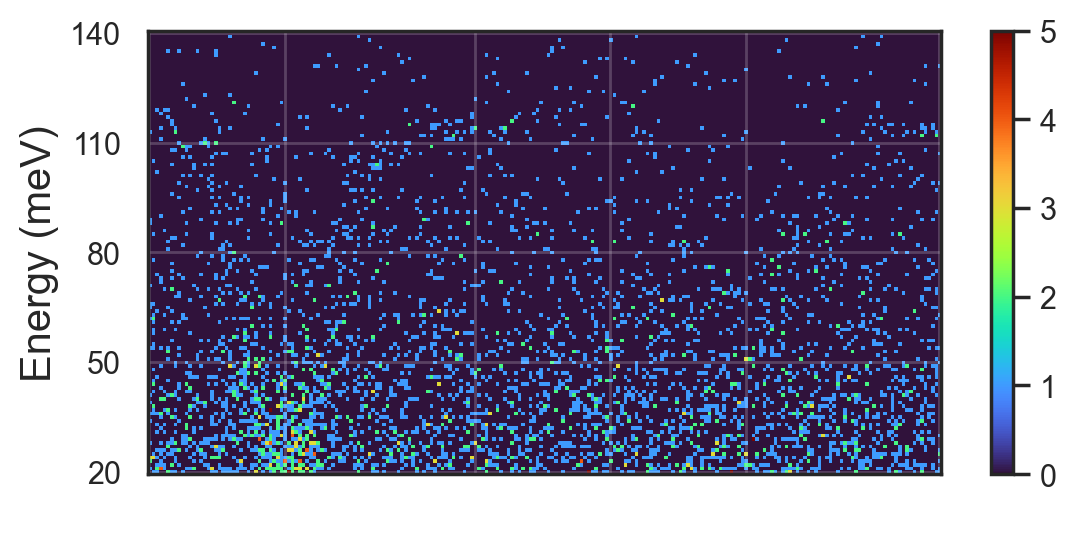

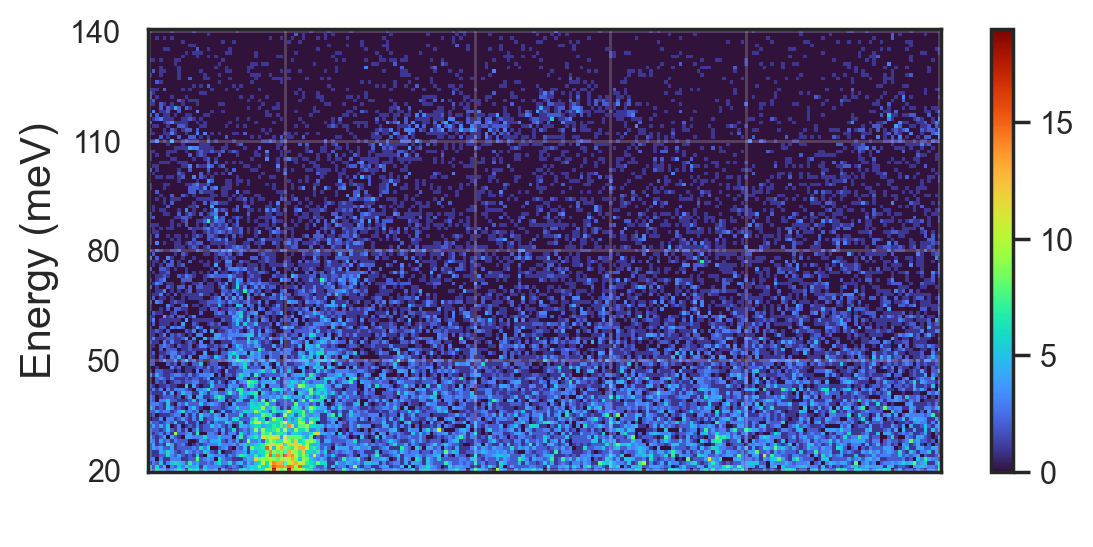

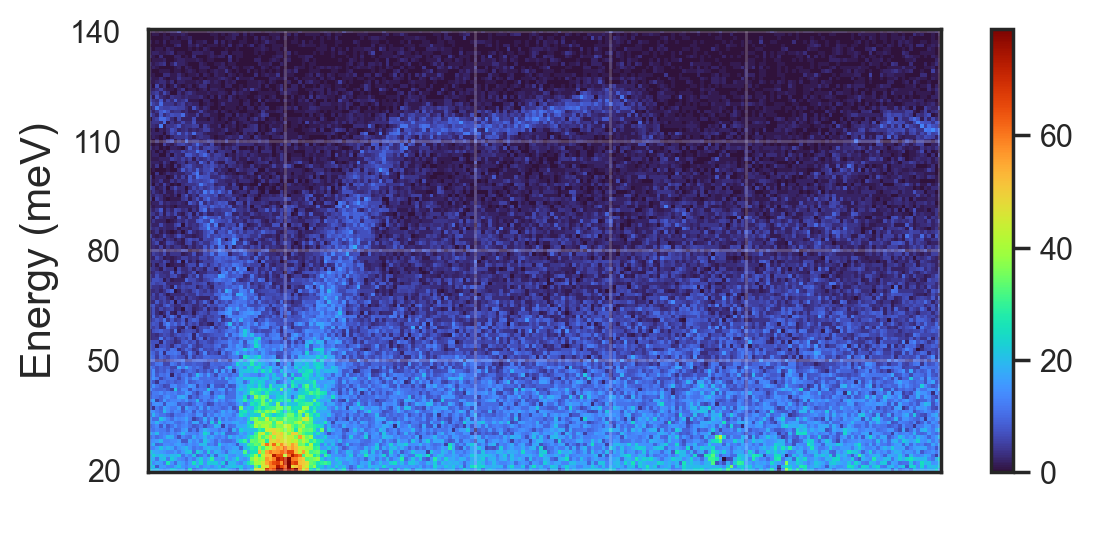

In [200]:
low_count_predictions = np.load('data_low_count/low_count_data_path2.npy')
indices = [3, 8, 13]
locations_of_x_gridlines = np.array([0, 37.0621, 89.4722, 126.5278, 163.5900, 216.0000], dtype=np.int16)

for index in indices:
    
    plt.figure(dpi = 200)
    plt.grid(which='major', axis='both', linestyle='-', color='white',alpha=0.2)  
    plt.imshow(low_count_predictions[index].T, origin='lower', cmap='turbo') 
    plt.yticks(np.linspace(0,120,5),list(np.linspace(20,140,5).astype(int)))
    plt.xticks(list(locations_of_x_gridlines), color = 'white')
    plt.colorbar(shrink = 0.6)
    plt.clim(vmin=0)
    plt.ylabel('Energy (meV)', fontsize= 15)
    #plt.xlabel("Trajectory " + str(n+1), fontsize = 20)

    plt.savefig('mc_samples_' + str(index) + '.pdf', format='pdf')
    plt.show()


### Real Data Visualization (with and without background)

In [250]:
# Load experimental slice 1 
c_q_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path2_woBG.csv'), header=None)).T
c_E_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Elist_path2_woBG.csv'), header=None)[0]).T
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2.csv'), header=None)).T
c_sqw_slice1_woBG = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2_woBG.csv'), header=None)).T

print(c_sqw_slice1_woBG.shape)
# Load experimental slice 2
c_q_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path3_woBG.csv'), header=None)).T
c_E_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Elist_path3_woBG.csv'), header=None)[0]).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3.csv'), header=None)).T
c_sqw_slice2_woBG = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3_woBG.csv'), header=None)).T

print(c_sqw_slice2_woBG.shape)


(217, 121)
(217, 121)


In [239]:
locations_of_x_gridlines

array([  0,  37,  89, 126, 163, 216], dtype=int16)

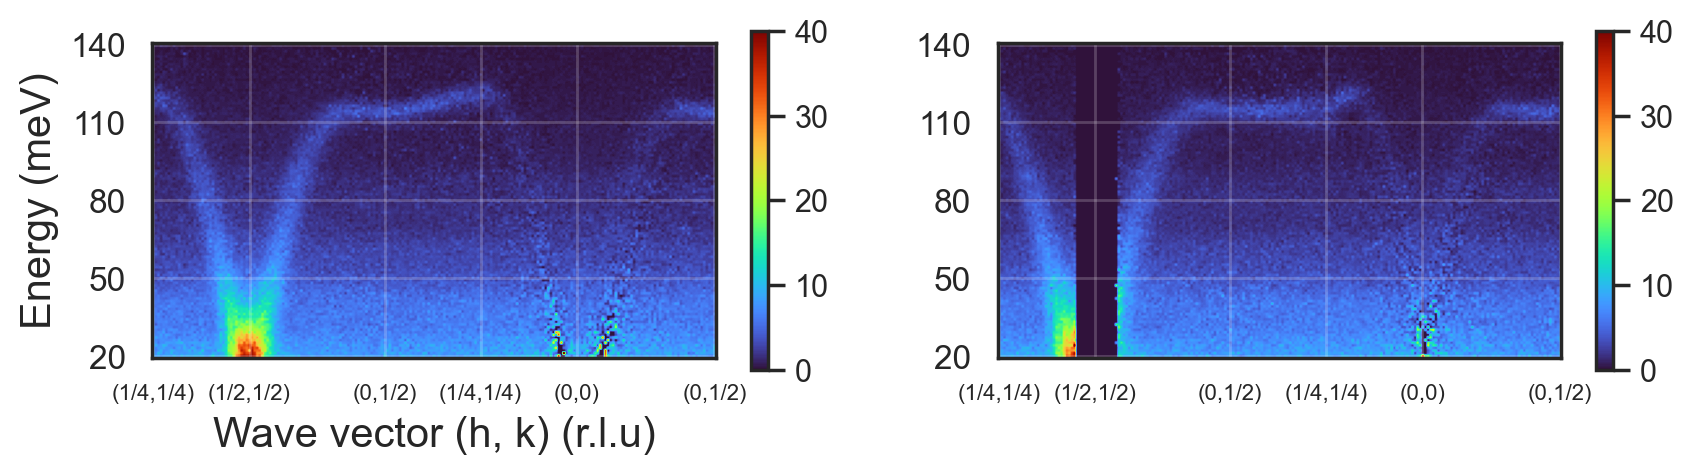

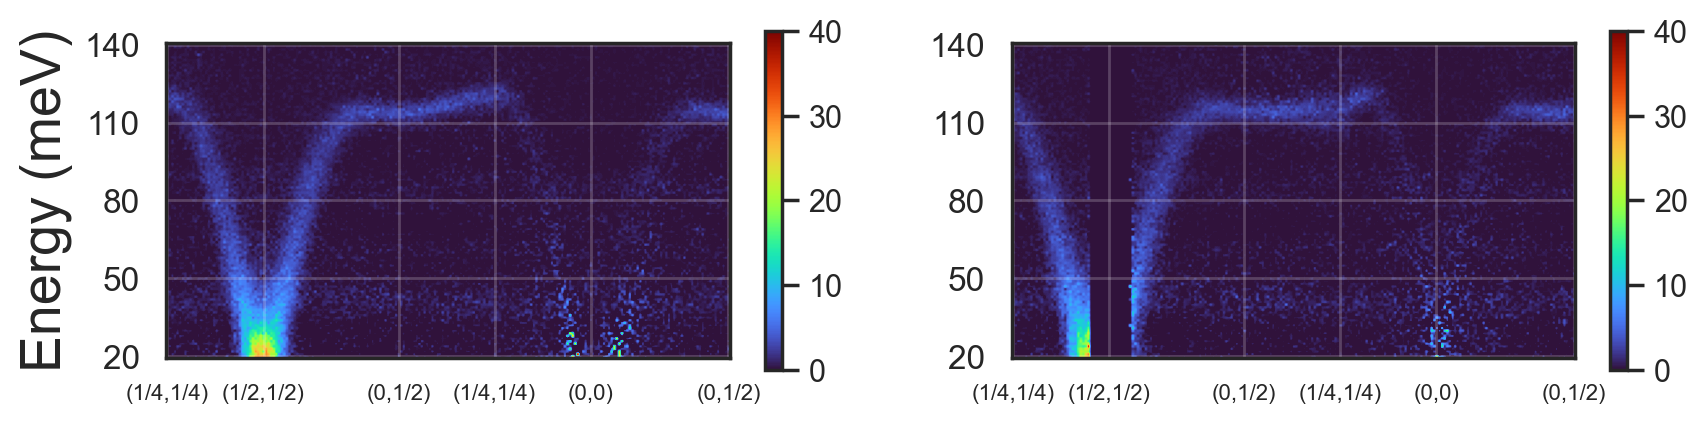

In [261]:
locations_of_x_gridlines = np.array([0, 37.0621, 89.4722, 126.5278, 163.5900, 216.0000], dtype=np.int16)
fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
im1 = axs[0].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo', vmin=0, vmax=40)
cb1 = fig.colorbar(im1, ax=axs[0], shrink = 0.22)
im2 = axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo', vmin=0, vmax=40)
cb2 = fig.colorbar(im2, ax=axs[1], shrink = 0.22)
axs[0].set_ylabel('Energy (meV)', fontsize= 15)
axs[0].grid(which='major', axis='both', linestyle='-', color='white',alpha=0.2)  
axs[1].grid(which='major', axis='both', linestyle='-', color='white',alpha=0.2)  
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 12)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 12)
axs[0].set_xticks(list(locations_of_x_gridlines), ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=8)
axs[1].set_xticks(list(locations_of_x_gridlines), ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=8)
axs[0].set_xlabel('Wave vector (h, k) (r.l.u)', fontsize= 15)


plt.savefig('figures/figures_as_eps/original_data.pdf', format='pdf')
plt.show()

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
im1 = axs[0].imshow(c_sqw_slice1_woBG.T, origin = 'lower', cmap = 'turbo', vmin=0, vmax=40)
cb1 = fig.colorbar(im1, ax=axs[0], shrink = 0.22)
im2 = axs[1].imshow(c_sqw_slice2_woBG.T, origin = 'lower', cmap = 'turbo', vmin=0, vmax=40)
cb2 = fig.colorbar(im2, ax=axs[1], shrink = 0.22)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].grid(which='major', axis='both', linestyle='-', color='white',alpha=0.2)  
axs[1].grid(which='major', axis='both', linestyle='-', color='white',alpha=0.2)  
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 12)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 12)
axs[0].set_xticks(list(locations_of_x_gridlines), ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'],  fontsize=8)
axs[1].set_xticks(list(locations_of_x_gridlines), ['(1/4,1/4)', '(1/2,1/2)', '(0,1/2)', '(1/4,1/4)', '(0,0)', '(0,1/2)'], fontsize=8)

plt.savefig('figures/figures_as_eps/original_data_wobg.pdf', format='pdf')
plt.show()

### Prediction Visualization (using only path1)

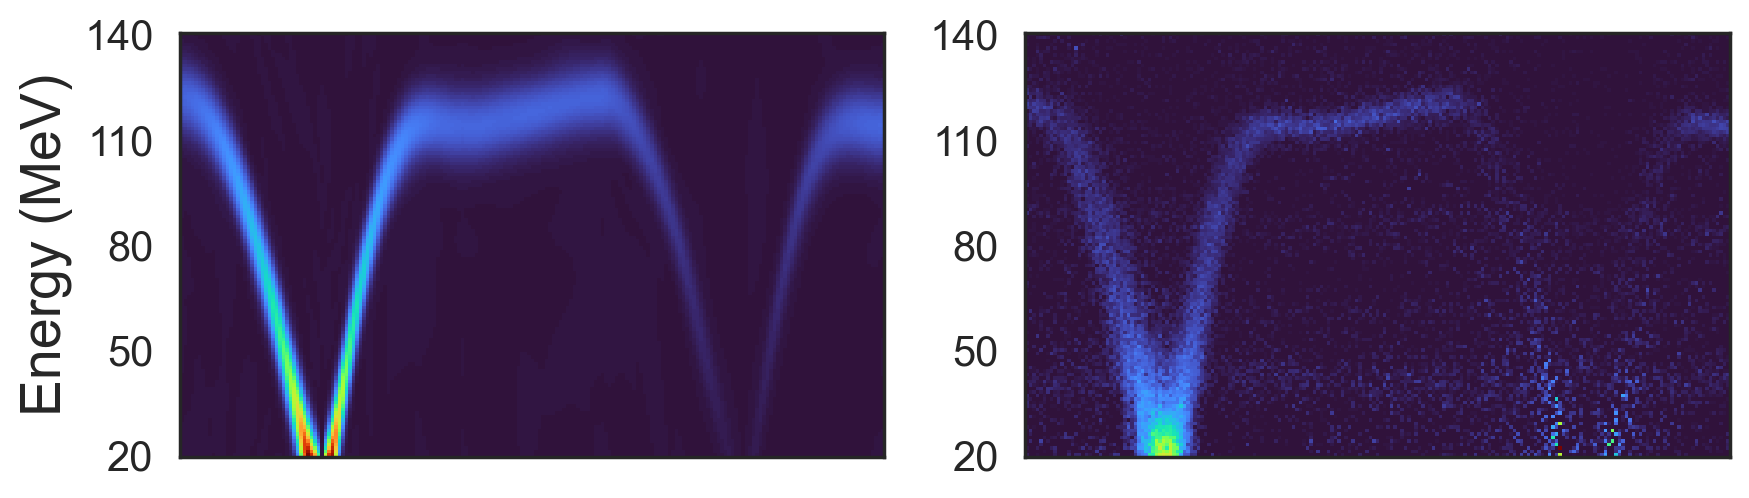

In [40]:
pred_slice1_image = np.exp(np.load('figures/data_for_figures/prediction_array_path1.npy')) - 1

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
axs[0].imshow(pred_slice1_image, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice1_woBG.T, origin = 'lower', cmap = 'turbo', vmin=0.1)
#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (MeV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.show()

### Using only path 2

[]

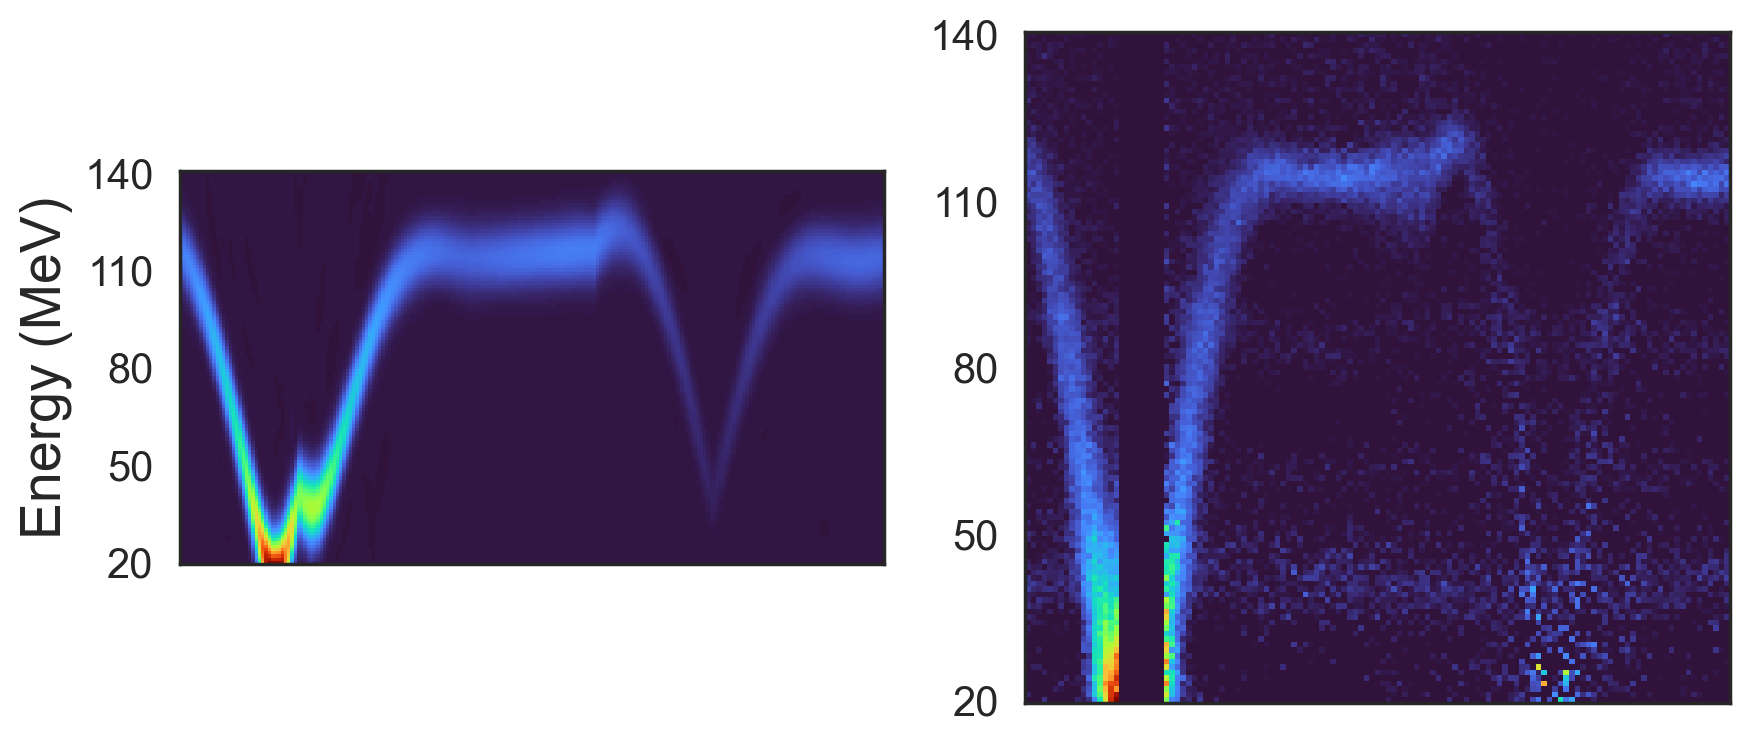

In [202]:
pred_slice2_image = np.exp(np.load('figures/data_for_figures/prediction_array_path2.npy')) - 1

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
axs[0].imshow(pred_slice2_image, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice2_woBG.T, origin = 'lower', cmap = 'turbo', vmin=0.1)
#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (MeV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

### Using both paths 

In [87]:
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path2.csv'), header=None)).T
np.sum((c_sqw_slice1[0:-1] - c_sqw_slice1[1:])**2, axis=1)

array([9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       9.64506173e-05, 9.64506173e-05, 9.64506173e-05, 9.64506173e-05,
       0.00000000e+00, 9.24556213e-05, 9.24556213e-05, 9.24556213e-05,
       9.24556213e-05, 9.24556213e-05, 9.24556213e-05, 9.24556213e-05,
       9.24556213e-05, 9.24556213e-05, 9.24556213e-05, 9.24556213e-05,
       9.24556213e-05, 9.24556213e-05, 9.24556213e-05, 9.24556213e-05,
       9.24556213e-05, 9.24556213e-05, 9.24556213e-05, 9.24556213e-05,
      

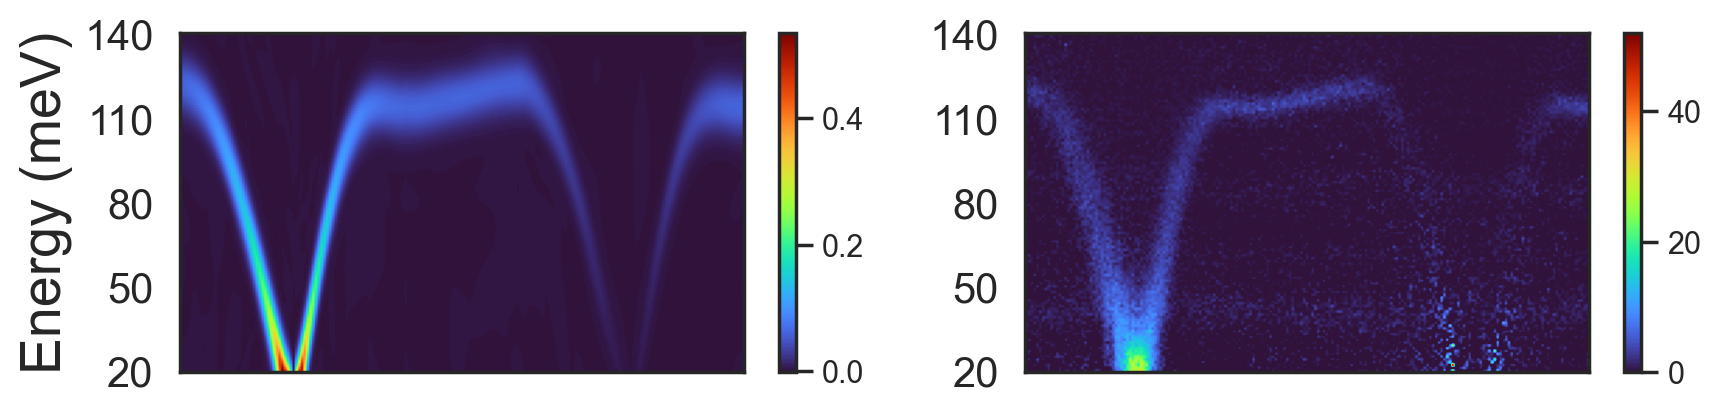

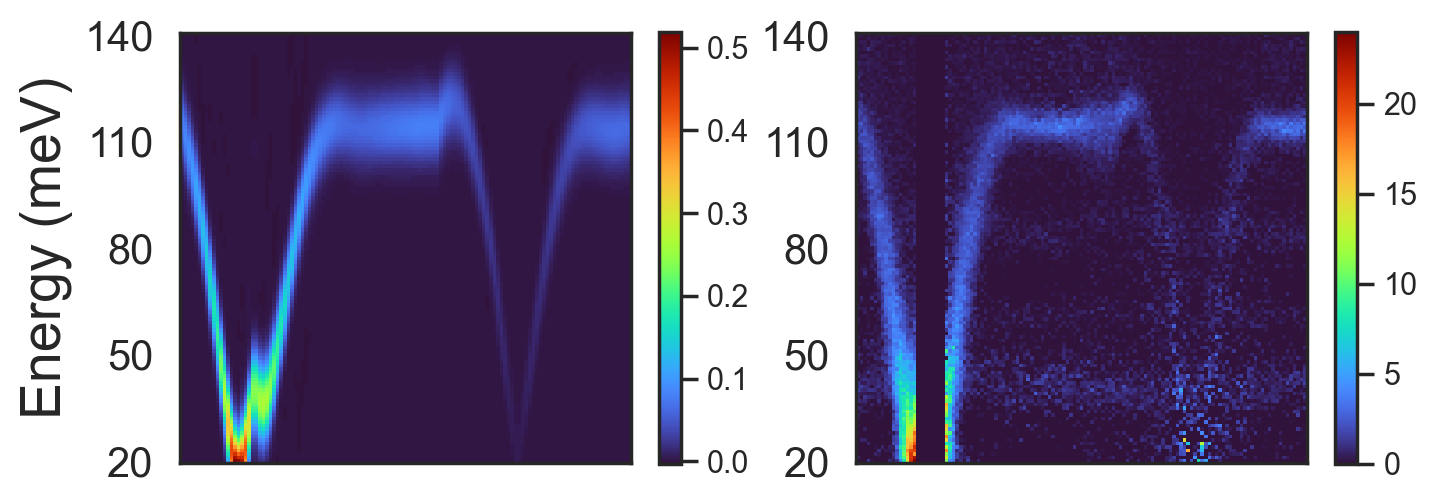

In [41]:
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2_woBG.csv'), header=None)).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3_woBG.csv'), header=None)).T

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
im1 = axs[0].imshow(pred_slice1_image, origin = 'lower', cmap = 'turbo')
cb1 = fig.colorbar(im1, ax=axs[0], shrink = 0.22)

#axs[0].set_title('Predicted Slice 1', fontsize = 20)
im2 = axs[1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo', vmin=0)
cb2 = fig.colorbar(im2, ax=axs[1], shrink = 0.22)

#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.show()

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(8,10))
im1 = axs[0].imshow(pred_slice2_image, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
im2 = axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo' , vmin=0)

fig.colorbar(im1, ax=axs[0], shrink = 0.28)
fig.colorbar(im2, ax=axs[1], shrink = 0.28)

#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.show()